# Método de Müller

+ Este método permite encontrar cualquier tipo de raíz, real o compleja, aun cuando éstas sean repetidas.
+ Es una extensión del método de la secante, por lo tanto, no requiere de la evaluación de la derivada de la función.
> + ¡Recordando! El método de la secante aproxima la función $f(x)$ por una línea recta que pasa por los puntos $(x_{i-1}, f(x_{i-1}))$ y $(x_i,f(xi)) $. El punto de intersección de esta línea con el eje $x$ da la nueva aproximación a la raíz $(\bar{x})$
+ El método de Müller en lugar de aproximar $f(x)$ por una función lineal (línea recta o polinomio de grado 1), aproxima $f(x)$ por un polinomio $p(x)$ de grado $n > 1$ que coincida con $f(x)$ en los puntos de abscisas $x_i, x_{i–1},\ldots, x_{i–n}$, y determinar $x_{i+1}$ como una de las raíces de $p(x)$.


<img src="https://drive.google.com/uc?id=1CPMVgFfHOSO_nIikN4Z_Y8G4Mft1_vFP&export=download" width="100%">


## Aplicación del método de Müller para el caso de $n=2$ o $p(x)=a_0+a_1x+a_2x^2$

De manera general, los pasos a seguir son:

> **Paso 1**: Se proponen tres valores iniciales $x_0, x_1, x_2$.

> **Paso 2**: Se halla el polinomio $p(x)$ de segundo grado que pasa por los puntos $(x_0, f(x_0))$, $(x_1, f(x_1))$ y $(x_2, f(x_2))$.

> **Paso 3**: Se toma una de las raíces de $p (x)$, la más cercana a $x_2$,
como la siguiente aproximación $x_3$. 

> **Paso 4**: Se repite los pasos 2 y 3 con los nuevos valores iniciales $x_1$, $x_2$ y  $x_3$, y se termina el proceso tan pronto como se satisfaga algún criterio de convergencia. 


Para construir y obtener las raíces del polinomio $p(x)$ en el **Paso 2** y **3**:

Con los valores iniciales, usando la siguiente notación $x_i, x_{i-1}, x_{i-2}$ para $x_2, x_1, x_0$ respectivamente. Se obtienen tres aproximaciones distintas a una de las raíces de $f(x)=0$.

$$\begin{align*}
f_i &= f(x_i)\\
f_{i-1} &= f(x_{i-1})\\
f_{i-2} &= f(x_{i-2})
\end{align*}$$

Con las aproximaciones, se determinan 

$$\begin{align*}
f[x_i,x_{i-1}] &= \dfrac{f_i-f_{i-1}}{x_i-x_{i-1}}\\
f[x_{i-1},x_{i-2}] &= \dfrac{f_{i-1}-f_{i-2}}{x_{i-1}-x_{i-2}}\\
f[x_i,x_{i-1},x_{i-2}] &= \dfrac{f[x_i,x_{i-1}]-f[x_{i-1},x_{i-2}]}{x_i-x_{i-2}}
\end{align*}$$

para construir $p(x)=a_0+a_1x+a_2x^2$


$$p(x) = f_i + f[x_i,x_{i-1}](x-x_i) + f[x_i,x_{i-1},x_{i-2}](x-x_i)(x-x_{i-1})$$

donde:

$$\begin{align*}
a_2 &= f[x_i,x_{i-1},x_{i-2}]\\
a_1 &= f[x_i,x_{i-1}]-(x_i + x_{i-1})a_2\\
a_0 &= f_i - x_i(f[x_i,x_{i-1}]-x_{i-1}a_2)
\end{align*}$$

Con los valores de $a_0$, $a_1$ y $a_2$ se calculan las raíces de $p(x)$ con la siguiente fórmula

$$x_{i+1} = \dfrac{2a_0}{-a_1 \pm (a_1^2-4a_0a_2)^{1/2}}$$


De los denominadores

$$\begin{align*}
&-a_1 + (a_1^2-4a_0a_2)^{1/2}\\
&-a_1 - (a_1^2-4a_0a_2)^{1/2}
\end{align*}$$

se selecciona el signo que precede al radical de manera que el denominador sea máximo en magnitud, y la raíz correspondiente es la siguiente aproximación $x_{i+1}$. 


**Ejemplo**:

Sea la siguiente función

$$f(x) = x^3+2x^2+10x-20$$

cuyo gráfico es

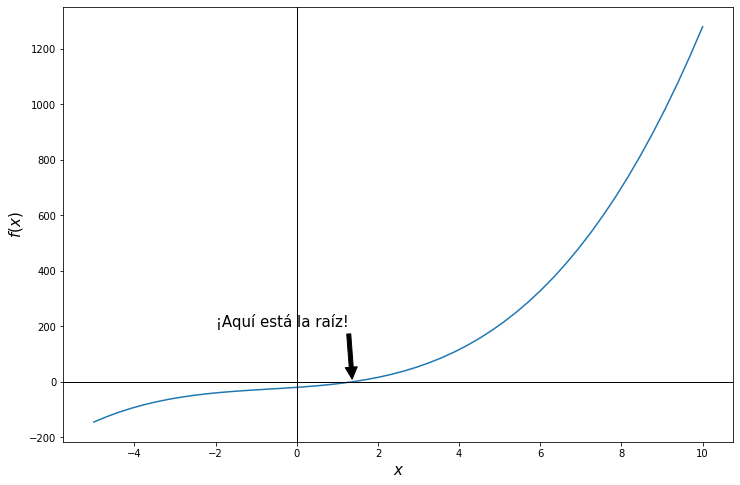

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
  return x**3+2*x**2+10*x-20
x = np.linspace(-5,10)
plt.figure(figsize=(12,8))
plt.plot(x,f(x))
plt.axhline(linewidth=1, color='k')
plt.axvline(linewidth=1, color='k')
plt.annotate("¡Aquí está la raíz!", xy=(1.36881,0), xytext=(-2, 200),
             arrowprops=dict(facecolor='black', shrink=0.05),fontsize=15)
plt.xlabel(r"$x$", fontsize=15)
plt.ylabel(r"$f(x)$",fontsize=15)
plt.show()

Aplique el método de Müller con los valores iniciales siguientes $x_0 = 0$, $x_1=1$ y $x_2=2$.

## Primera iteración

In [ ]:
# Valores iniciales
x0 = 0.0
x1 = 1.0
x2 = 2.0

# Criterios de convergencia
EPSILON = 0.0001

In [ ]:
f0 = f(x0)
f1 = f(x1)
f2 = f(x2)

fx1x2 = (f1-f0)/(x1-x0)
fx2x1 = (f2-f1)/(x2-x1)
fx2x1x0 = (fx2x1 - fx1x2)/(x2-x0)

a2 = fx2x1x0 
a1 = fx2x1 - (x2+x1)*a2
a0 = f2 - x2*(fx2x1-x1*a2)

den1 = -a1+(a1**2-4*a0*a2)**(1/2) 
den2 = -a1-(a1**2-4*a0*a2)**(1/2)

if abs(den1)>abs(den2):
  x3 = 2*a0/(-a1+(a1**2-4*a0*a2)**(1/2))
  x0 = x1
  x1 = x2
  x2 = x3
else:
  x3 = 2*a0/(-a1-(a1**2-4*a0*a2)**(1/2))
  x0 = x1
  x1 = x2
  x2 = x3

In [ ]:
print(x3)

1.3540659228538017


In [ ]:
print("x0 =", x0, "x1 = ", x1, "x2 = ",x2)

x0 = 1.0 x1 =  2.0 x2 =  1.3540659228538017


Graficamente ésta primera iteración queda de la forma siguiente

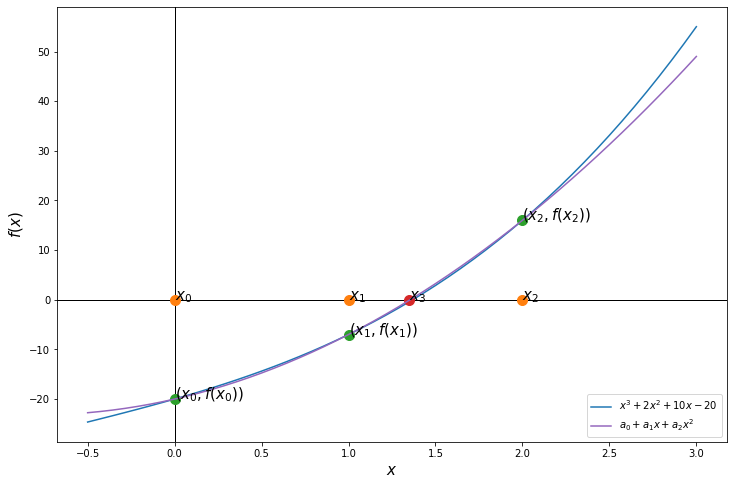

In [ ]:
x = np.linspace(-0.5,3)
x0 = 0.0
x1 = 1.0
x2 = 2.0
x3 = 1.35
plt.figure(figsize=(12,8))
plt.plot(x,f(x),label=r"$x^3+2x^2+10x-20$")
plt.axhline(linewidth=1, color='k')
plt.axvline(linewidth=1, color='k')
plt.plot([x0,x1,x2], [0,0,0], 'o', markersize=10)
plt.plot([x0,x1,x2], [f(x0),f(x1),f(x2)], 'o', markersize=10)
plt.text(x0,0, r'$x_0$',fontsize=15)
plt.text(x0,f(x0), r'$(x_0,f(x_0))$',fontsize=15)
plt.text(x1,0, r'$x_1$',fontsize=15)
plt.text(x1,f(x1), r'$(x_1,f(x_1))$',fontsize=15)
plt.text(x2,0, r'$x_2$',fontsize=15)
plt.text(x2,f(x2), r'$(x_2,f(x_2))$',fontsize=15)

plt.text(x3, 0, r'$x_3$',fontsize=15)
plt.plot([x3], [0], 'o', markersize=10)

plt.plot(x,a0 + a1*x + a2*x**2, label=r'$a_0+a_1x+a_2x^2$')


plt.xlabel(r"$x$", fontsize=15)
plt.ylabel(r"$f(x)$",fontsize=15)

plt.legend()
plt.show()